In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn import preprocessing

In [19]:
df = pd.read_csv("uber.csv")

In [20]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [21]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [22]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace = True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].median(),inplace = True)

In [23]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [24]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,errors = 'coerce')

In [26]:
df = df.assign(
             second = df.pickup_datetime.dt.second,
             minute = df.pickup_datetime.dt.minute,
            hour = df.pickup_datetime.dt.hour,
            day = df.pickup_datetime.dt.day,
            month = df.pickup_datetime.dt.month,
            year = df.pickup_datetime.dt.year,
            dayofweek = df.pickup_datetime.dt.dayofweek)
df = df.drop('pickup_datetime','Unnamed: 0', axis = 1)

In [31]:
df = df.drop(['key','Unnamed: 0'], axis = 1)

In [32]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
second                 int64
minute                 int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
second                  AxesSubplot(0.125,0.456463;0.352273x0.0920732)
minute               AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.345976;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.235488;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dayofweek                  AxesSubplot(0.125,0.125;0.352273x0.0920732)
dtype: object

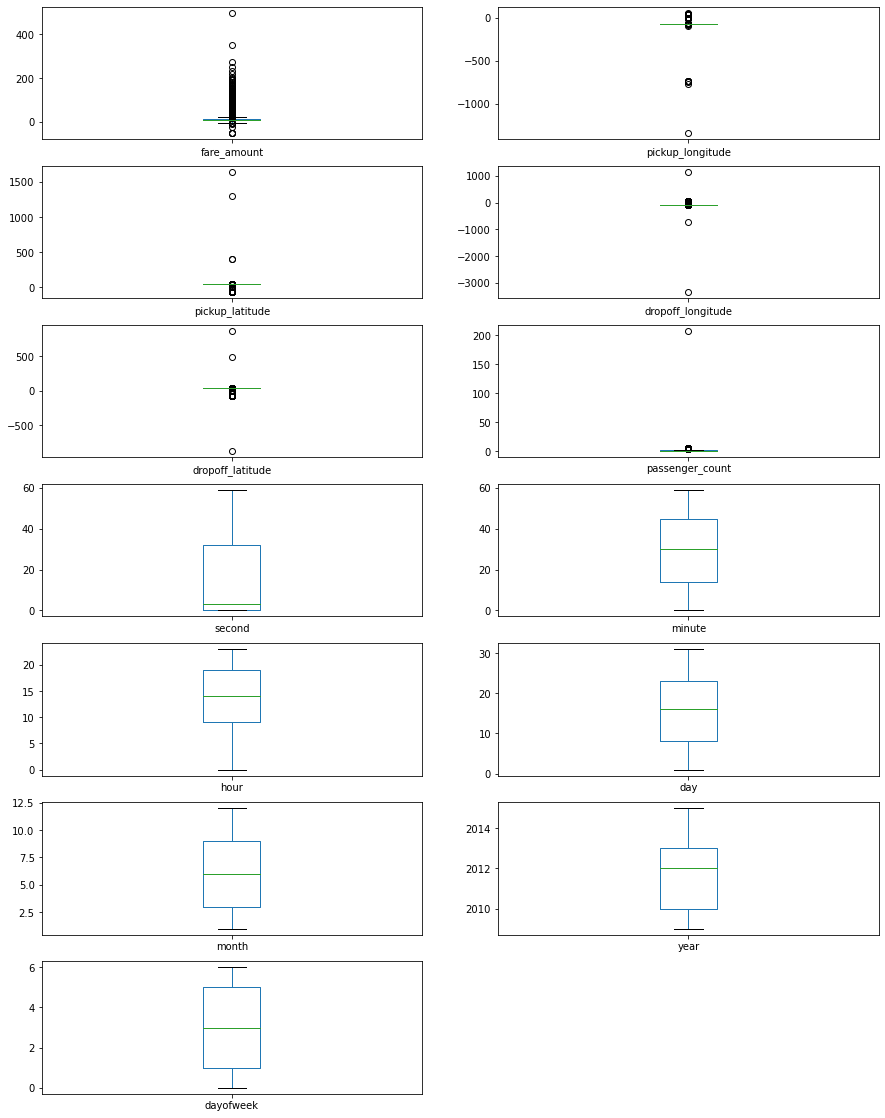

In [33]:

df.plot(kind="box",subplots= True, layout= (7,2),figsize =(15,20))

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
second                  AxesSubplot(0.125,0.456463;0.352273x0.0920732)
minute               AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.345976;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.235488;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dayofweek                  AxesSubplot(0.125,0.125;0.352273x0.0920732)
dtype: object

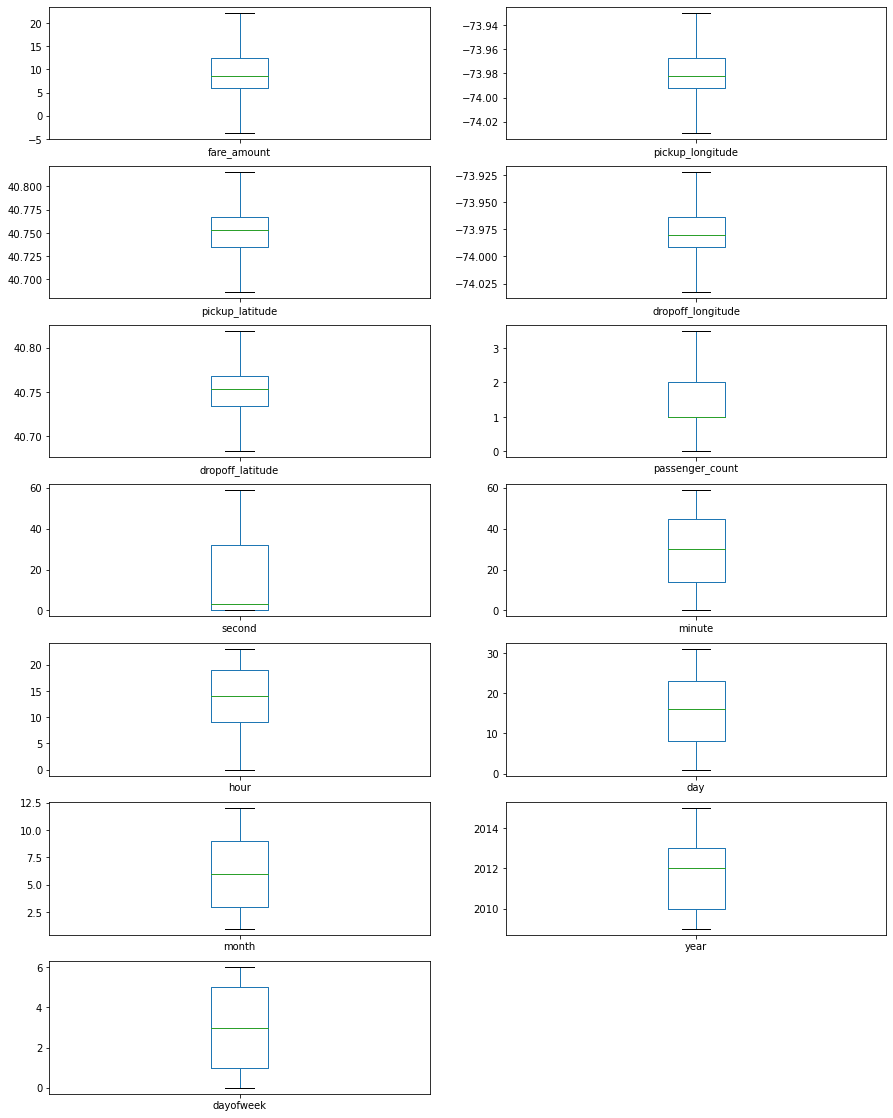

In [34]:
import numpy as np
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

# Assuming that 'df' is your DataFrame and 'df.columns' is the list of columns in your DataFrame
df = treat_outliers_all(df , df.columns)

# Plotting boxplots for all columns in the DataFrame
df.plot(kind = "box", subplots = True, layout = (7,2), figsize=(15,20))

In [35]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
second                 int64
minute                 int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

In [36]:
corr = df.corr()

In [37]:
corr.style.background_gradient(cmap = 'BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125871,0.015778,0.002976,-0.009246,-0.023623,0.004534,0.030817,0.141277,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073311,-0.013213,-0.013308,-0.005792,0.011579,-0.003204,0.001169,0.010198,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515735,-0.012889,0.006061,-0.003454,0.029681,-0.001553,0.001562,-0.014243,-0.042310
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245665,-0.009325,-0.005227,-0.004832,-0.046578,-0.004027,0.002394,0.011355,-0.003349
dropoff_latitude,-0.125871,0.073311,0.515735,0.245665,1.000000,-0.006329,0.005177,-0.003160,0.019764,-0.003499,-0.001190,-0.009595,-0.031932
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006329,1.000000,-0.194292,0.001115,0.020274,0.002712,0.010351,-0.009749,0.048550
second,0.002976,-0.013308,0.006061,-0.005227,0.005177,-0.194292,1.000000,0.001987,-0.013240,-0.002107,-0.049937,0.083345,-0.000136
minute,-0.009246,-0.005792,-0.003454,-0.004832,-0.003160,0.001115,0.001987,1.000000,0.001138,-0.001217,-0.001485,-0.002805,-0.002328
hour,-0.023623,0.011579,0.029681,-0.046578,0.019764,0.020274,-0.013240,0.001138,1.000000,0.004677,-0.003926,0.002156,-0.086947
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003499,0.002712,-0.002107,-0.001217,0.004677,1.000000,-0.017360,-0.012170,0.005617


In [39]:
incorrect_coordinates = df.loc [
    (df.pickup_latitude > 90) | (df.pickup_latitude <-90)|
    (df.dropoff_latitude >90) | (df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
    (df.dropoff_longitude > 90) | (df.dropoff_longitude < -90)
]
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [40]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,0,47,17,28,8,2014,3


In [42]:
!pip install haversine
import haversine as hs

  Using cached haversine-2.8.0-py2.py3-none-any.whl (7.7 kB)


In [43]:
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)
df['dist_travel_km'] = travel_dist

In [44]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,0,47,17,28,8,2014,3,4.116088


In [45]:
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
y = df['fare_amount']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

In [49]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [50]:
regression.fit(X_train, y_train) 

LinearRegression()

In [53]:
regression.intercept_

7443.143086116984

In [57]:
regression.coef_

array([ 24.15402573, -14.21917335,  52.36851487, -29.26927751])

In [60]:
pred = regression.predict(X_test)
print(pred)

[10.56509108  9.52442007  8.29093802 ...  8.88391996 11.39220543
  9.09166943]


In [61]:
y_test

163791     3.7
110661     4.5
97224      6.0
165062    14.1
199666     9.0
          ... 
19373      8.1
70444     12.5
126613     5.0
80262     13.7
44550      9.5
Name: fare_amount, Length: 66000, dtype: float64

In [62]:
from sklearn.metrics import r2_score
r2_score (y_test,pred)

0.08792320790300756

In [64]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,pred)
print(MSE)

26.95157107393341


In [67]:
RMSE = np.sqrt(MSE)
print(RMSE)

5.191490255594573


In [68]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred = rf.predict(X_test)
y_pred

array([ 4.077,  5.835,  6.125, ...,  4.789, 14.239, 10.16 ])

In [70]:
R2_Random = r2_score(y_test,y_pred)
print(R2_Random)

MSE_Random = mean_squared_error(y_test,y_pred)
print(MSE_Random)

RMSE_Random = np.sqrt(MSE_Random)
print(RMSE_Random)

0.7591822867050741
7.1160847112532455
2.6675990536910237


Enter a number: 23
Fibonacci value (recursive): 28657
Fibonacci value using Iteration: 28657
Number of steps taken by recursion: 46367
Iterative steps: 22
